In [49]:
import numpy as np
from matplotlib import pyplot as plt


The field, as well as points A and B as in the manual (0 - empty cell, 1 - wall, 2 - point A, 3 - point B):

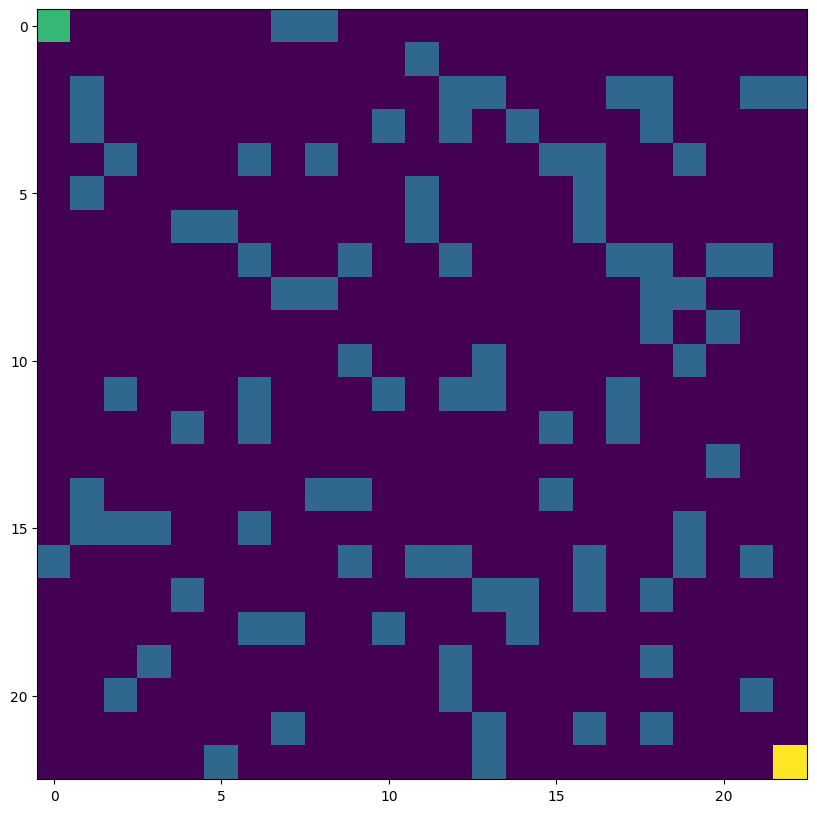

In [50]:
maze = [[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

A = (0, 0)
B = (22, 22)

maze[A[0]][A[1]] = 2
maze[B[0]][B[1]] = 3

plt.figure(figsize=(10, 10))
plt.imshow(maze)

1) Wave algorithm

In [51]:
def wave_shortest_path(maze, init_point, destination_point, diags=False):
    A_x, A_y = init_point[0], init_point[1]
    B_x, B_y = destination_point[0], destination_point[1]
    maze[A_x][A_y] = 0
    maze[B_x][B_y] = 0

    parents_X = np.zeros(
        np.array(maze).shape
    )  # X-coordinate of the parent cell to restore the answer (-1 - the parent is not defined)
    parents_X -= 1
    parents_X = parents_X.astype(int)

    parents_Y = np.zeros(
        np.array(maze).shape
    )  # Y-coordinate of the parent cell to restore the answer (-1 - the parent is not defined)
    parents_Y -= 1
    parents_Y = parents_Y.astype(int)

    distances = np.zeros(
        np.array(maze).shape
    )  # minimum distance from init_point to current cell (-1 - distance is undefined or infinite)
    distances -= 1
    distances = distances.astype(int)

    distances[A_x][A_y] = 0

    queue = [(A_x, A_y)]

    while len(queue) > 0:
        cur_point = queue[0]
        queue = queue[1:]

        if (
                cur_point[0] == B_x and cur_point[1] == B_y
        ):  # we have reached our destination
            break

        for x in range(-1, 2):
            for y in range(-1, 2):  # iterate over all neighbors
                if abs(x) + abs(y) == 0:  # you can't go out of the cell into yourself
                    continue
                if (
                        abs(x) + abs(y) > 1 and not diags
                ):  # you can't go diagonally if diags=False
                    continue
                new_point_X = cur_point[0] + x
                new_point_Y = cur_point[1] + y
                if (
                        new_point_X < 0
                        or new_point_X >= distances.shape[0]
                        or new_point_Y < 0
                        or new_point_Y >= distances.shape[1]
                ):  # cell is out of field
                    continue
                if maze[new_point_X][new_point_Y] != 0:  #  wall
                    continue
                if (
                        distances[new_point_X][new_point_Y] != -1
                ):  # we've already been there
                    continue

                # if we did get here, update the distances and the parent cell
                distances[new_point_X][new_point_Y] = (
                        distances[cur_point[0]][cur_point[1]] + 1
                )

                parents_X[new_point_X][new_point_Y] = cur_point[0]
                parents_Y[new_point_X][new_point_Y] = cur_point[1]

                queue.append((new_point_X, new_point_Y))

    total_path = [(B_x, B_y)]  # restoring the path

    cur_point = (B_x, B_y)
    while cur_point != (A_x, A_y):
        next_point = (
            parents_X[cur_point[0]][cur_point[1]],
            parents_Y[cur_point[0]][cur_point[1]],
        )
        total_path.append(next_point)
        cur_point = next_point

    total_path = list(reversed(total_path))
    return total_path


In [52]:
path = wave_shortest_path(maze, A, B) # shortest path from A to B over cells that have a common side
path_diag = wave_shortest_path(maze, A, B, True) # shortest path from A to B over cells that have a common side or vertex

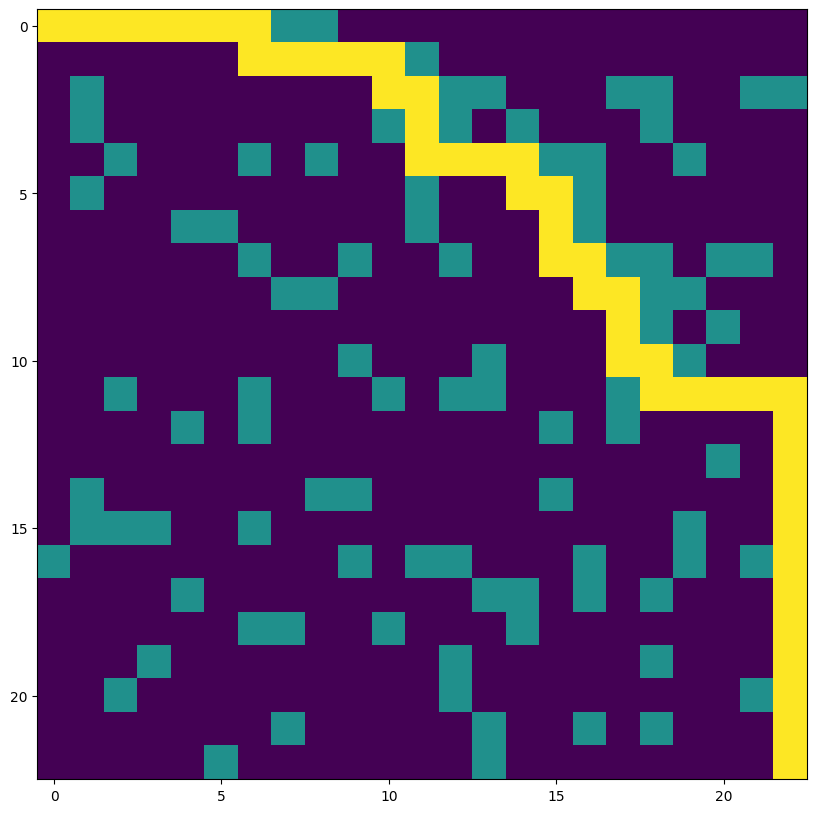

In [53]:
maze_with_path = np.copy(maze)
for p in path:
    maze_with_path[p[0]][p[1]] = 2

plt.figure(figsize=(10, 10))
plt.imshow(maze_with_path)

And the shortest path from A to B over cells that have a common side or vertex:

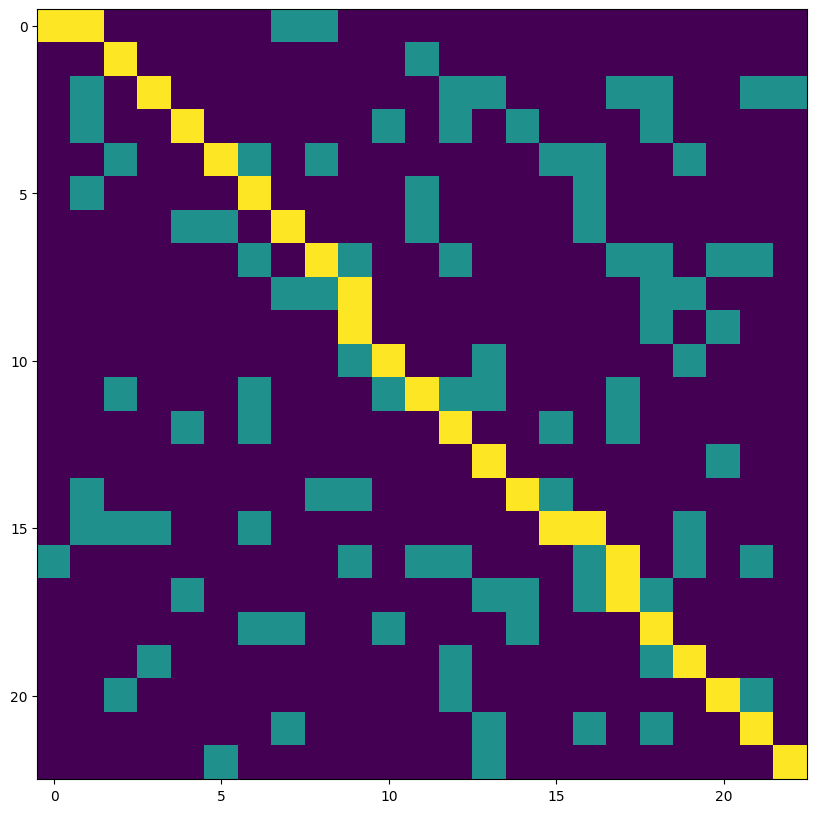

In [54]:
maze_with_path_diag = np.copy(maze)
for p in path_diag:
  maze_with_path_diag[p[0]][p[1]] = 2

plt.figure(figsize=(10, 10))
plt.imshow(maze_with_path_diag)

2)A* algorithm

In [55]:
def a_star_shortest_path(maze, init_point, destination_point, diags=False):
    A_x, A_y = init_point[0], init_point[1]
    B_x, B_y = destination_point[0], destination_point[1]
    maze[A_x][A_y] = 0
    maze[B_x][B_y] = 0

    g_function = np.zeros(np.array(maze).shape) # g(x) function for all cells (-1 - function not calculated yet)
    g_function -= 1
    g_function = g_function.astype(int)

    h_function = np.zeros(np.array(maze).shape) # function h(x) for all cells (-1 - function not calculated yet)
    h_function -= 1
    h_function = g_function.astype(int)

    parents_X = np.zeros(np.array(maze).shape) # X-coordinate of the parent cell to restore the response (-1 - no parent defined)
    parents_X -= 1
    parents_X = parents_X.astype(int)

    parents_Y = np.zeros(np.array(maze).shape) # Y-coordinate of the parent cell to restore the answer (-1 - parent is not defined)
    parents_Y -= 1
    parents_Y = parents_Y.astype(int)

    open_list = [(A_x, A_y)] # open list
    closed_list = set() # closed list

    g_function[A_x][A_y] = 0 # the distance from the original cell to itself is zero
    h_function[A_x][A_y] = 10 * (abs(B_x - A_x) + abs(B_y - A_y)) # Manhattan distance from source cell to destination multiplied by 10

    while len(open_list) > 0:

        max_index = -1
        min_value = 1E6

        for k in range(len(open_list)): # select the cell with the minimum function value f(x) = g(x) + h(x)
            if g_function[open_list[k][0]][open_list[k][1]] + h_function[open_list[k][0]][open_list[k][1]] < min_value:
                min_value = g_function[open_list[k][0]][open_list[k][1]] + h_function[open_list[k][0]][open_list[k][1]]
                max_index = k

        cur_point = open_list[max_index]

        if cur_point[0] == B_x and cur_point[1] == B_y: # we have reached our destination
            break

        open_list.pop(max_index)

        for x in range(-1, 2):
            for y in range(-1, 2): # loop through all neighbors
                if abs(x) + abs(y) == 0: # you can't go from cell to yourself
                    continue
                if abs(x) + abs(y) > 1 and not diags: # cannot walk diagonally if diags=False
                    continue
                new_point_X = cur_point[0] + x
                new_point_Y = cur_point[1] + y
                if new_point_X < 0 or new_point_X >= g_function.shape[0] or new_point_Y < 0 or new_point_Y >= g_function.shape[1]: # cell out of bounds
                    continue
                if maze[new_point_X][new_point_Y] != 0: # wall
                    continue
                if (new_point_X, new_point_Y) in open_list or (new_point_X, new_point_Y) in closed_list: # we've already been here
                    continue

                # if we still got here, update the values of the functions and the parent cell
                g_function[new_point_X][new_point_Y] = g_function[cur_point[0]][cur_point[1]] + 10 # always add 10
                if abs(x) + abs(y) > 1:
                    g_function[new_point_X][new_point_Y] += 4 # if we came diagonally, add 4 more, i.e. 14 in total

                # Manhattan distance to end cell multiplied by 10
                h_function[new_point_X][new_point_Y] = 10 * (abs(B_x - new_point_X) + abs(B_y - new_point_Y))

                parents_X[new_point_X][new_point_Y] = cur_point[0]
                parents_Y[new_point_X][new_point_Y] = cur_point[1]

                open_list.append((new_point_X, new_point_Y))

        closed_list.add(cur_point)

    total_path = [(B_x, B_y)] # restore the path

    cur_point = (B_x, B_y)
    while cur_point != (A_x, A_y):
        next_point = (parents_X[cur_point[0]][cur_point[1]], parents_Y[cur_point[0]][cur_point[1]])
        total_path.append(next_point)
        cur_point = next_point

    total_path = list(reversed(total_path))
    return total_path

In [56]:
path_a_star = a_star_shortest_path(maze_with_path_diag, A, B) # shortest path from A to B over cells that have a common side
path_a_star_diag = a_star_shortest_path(maze_with_path_diag, A, B, True) # shortest path from A to B over cells that have a common side or vertex

Visualize the shortest path from A to B over cells that have a common side:

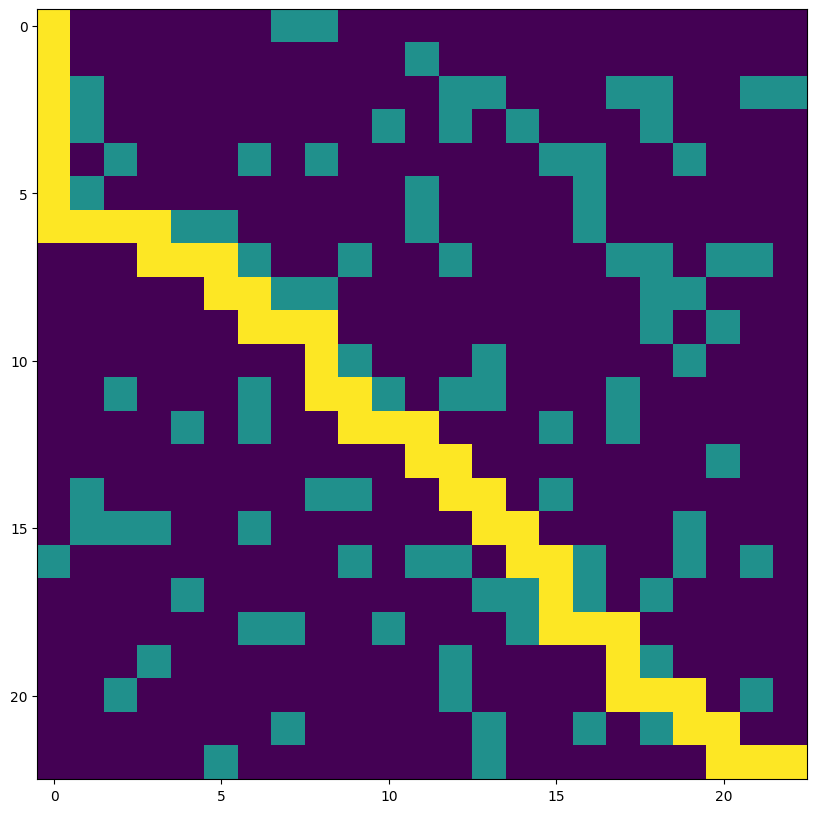

In [57]:
maze_with_path = np.copy(maze)
for p in path_a_star:
    maze_with_path[p[0]][p[1]] = 2

plt.figure(figsize=(10, 10))
plt.imshow(maze_with_path)

And the shortest path from A to B over cells that have a common side or vertex:

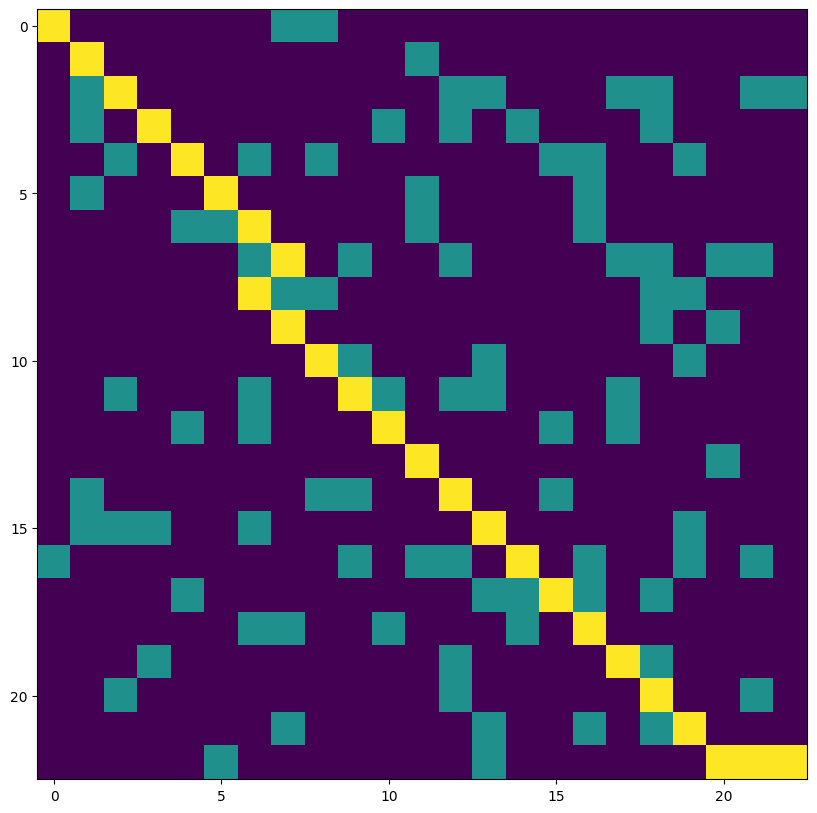

In [58]:
maze_with_path_diag = np.copy(maze)
for p in path_a_star_diag:
    maze_with_path_diag[p[0]][p[1]] = 2

plt.figure(figsize=(10, 10))
plt.imshow(maze_with_path_diag)